In [1]:
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [2]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [3]:
import glob
json_files=glob.glob('/work/francisco.jimenez/RIT/Metadata/*Metadata.json',recursive = True)

import importlib
importlib.reload(sxs)
conditions=np.asarray([['BHBH',None],['Non-Precessing',None],['Eccentricity',['>=0.01','<=0.50']]])
ritcat=sxs.SXS_catalogue("/work/francisco.jimenez/RIT/Data",conditions,catalogue="RIT")

systems=np.array([ritcat.metadata(j,parameters_list=['catalog-tag','system-type','eccentricity','relaxed-mass-ratio-1-over-2',
                                                     'final-mass','final-chi','initial-bh-chi1z','initial-bh-chi2z','freq-start-22']) for j in json_files])

boolean= np.array(['e' in elist for elist in systems[:,0]])

for i in range(len(systems)):
    if 'e' in systems[:,0][i] and float(systems[:,2][i])<0.5:
        boolean[i]=True
    else:
        boolean[i]=False

ecc_prec_cases=systems[boolean]
boolean = np.array(['Precessing' not in elist for elist in ecc_prec_cases])
ecc_cases=ecc_prec_cases[boolean]
ecc_cases[:,2]=np.array([float(i[2]) for i in ecc_cases])
ecc_cases[:,3]=np.array([1/float(i[3]) for i in ecc_cases])
ecc_cases[:,4]=np.array([float(i[4]) for i in ecc_cases])
ecc_cases[:,5]=np.array([float(i[5]) for i in ecc_cases])
ecc_tags=ecc_cases[:,0]


h5_files=[glob.glob('/work/francisco.jimenez/RIT/Data/*'+j.replace(':','-')+'*',recursive = True)[0] for j in ecc_tags]


/work/kailai.wang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [4]:
import csv
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("export_folder/rit_mismatch_tseob_final/")
#filenames = find_csv_filenames("export_folder/rit_mismatch_seobhm/")

data_file_list=[]
info_file_list=[]

for name in filenames:
    if "rit_mismatch" in name:
        data_file_list.append("export_folder/rit_mismatch_tseob_final/"+name)
        #data_file_list.append("export_folder/rit_mismatch_seobhm/"+name)
    # if "rit_mismatch" in name:
    #     data_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)
        
        

for name in filenames:
    if "model" in name:
        info_file_list.append("export_folder/rit_mismatch_tseob_final/"+name)
        #info_file_list.append("export_folder/rit_mismatch_seobhm/"+name)
        #info_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)


data_list=[]

for i in data_file_list:
    with open(i, newline='') as csvfile:
        data_read = list(csv.reader(csvfile))
        data_list.append(data_read)

print(len(info_file_list))
print(len(data_list))

name_list=[]
mismatch_list=[]
mass_list=[]
max_mismatch_list=[]

for i in range(0,len(data_list)):
    mismatch=[]
    mass=[]
    name=""
    max_acc=-100
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='':
            mismatch_item=float(data_list[i][j][1])
            if mismatch_item>max_acc:
                max_acc=mismatch_item
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            mass.append(mass_item)
    max_mismatch_list.append(max_acc)
    mismatch_list.append(mismatch)
    mass_list.append(mass)
    name_list.append(data_file_list[i])


572
252


In [5]:
modes=[[2,2]]
#ecc_tags,len(ecc_tags)
#h5_files

In [6]:
# ecc_tags[0]
x=0
good_array=[]
while x<30:
    if x!=7 and x!=12 and x!=25 and x!=29 and x!=31 and x!=17 and x!=62 and x!=103:
        if x!=8:
            good_array.append(x)
    x+=1
good_array.append(40)
good_array.append(41)
y=50
while y<61:
    good_array.append(y)
    y+=1
#print(good_array)

Found! i=0; RIT:eBBH:1173
initial22  [0.2, 15.757316552019907]
bnds  ((0.0, 0.3), (15.006968144780863, 22.510452217171295))


/work/kailai.wang/venv/lib/python3.7/site-packages/scipy/interpolate/_bsplines.py:327: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.ascontiguousarray(x.ravel(), dtype=np.float_)


------------------------==
Found! i=1; RIT:eBBH:1180
initial22  [0.235, 15.757316552019907]
bnds  ((0.0, 0.41), (15.006968144780863, 22.510452217171295))
------------------------==
Found! i=2; RIT:eBBH:1178
initial22  [0.225, 15.757316552019907]
bnds  ((0.0, 0.41), (15.006968144780863, 22.510452217171295))
------------------------==
Found! i=3; RIT:eBBH:1843
initial22  [0.4, 5.252438850673302]
bnds  ((0.0, 0.41), (5.0023227149269545, 7.503484072390432))
------------------------==
Found! i=4; RIT:eBBH:1224
initial22  [0.19, 15.757316552019907]
bnds  ((0.0, 0.3), (15.006968144780863, 22.510452217171295))
------------------------==
Found! i=5; RIT:eBBH:1400
initial22  [0.36, 5.252438850673302]
bnds  ((0.0, 0.41), (5.0023227149269545, 7.503484072390432))
------------------------==
Found! i=6; RIT:eBBH:1101
initial22  [0.07, 15.757316552019907]
bnds  ((0.0, 0.3), (15.006968144780863, 22.510452217171295))
------------------------==
Found! i=9; RIT:eBBH:1517
initial22  [0.4, 5.252438850673302

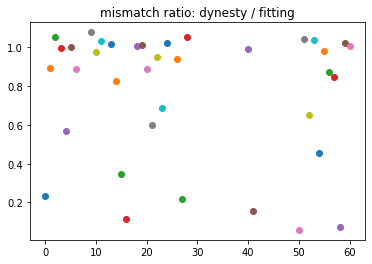

In [7]:
wave={}
h5_files_list=[]

for i in good_array:
#for i in range(7,8):
    try:
        i_to_plot=i
        tag=ecc_tags[i]
        wave[tag]=sxs.Generate_Georgia_Waveform(h5_files[i],modes,
                                        zero_align=False,
                                        sampling_rate=0.1,modes_combined=False,inclination=0,
                                        coa_phase=0,RD=False,toffset=0)
        rit_t=wave[ecc_tags[i]][0][:,0]
        rit_h=wave[ecc_tags[i]][0][:,1]
        #----------------------------------------------------------------------
        for name in ecc_cases:
            if name[0]==ecc_tags[i]:
                ritwavename=str(name[0])
                print("Found! i=" + str(i) +"; " + str(name[0]))
                system_type=name[1]
                #print("system type: " + str(system_type))
                eccentricity = name[2]
                #print("eccentricity "+str(eccentricity))
                relaxed_mass_ratio_1_over_2=[3][0]
                #print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
                final_mass=name[4]
                #print("final_mass: "+ str(final_mass))
                final_chi=name[5]
                #print("final_chi: "+ str(final_chi))
                initial_bh_chi1z=name[6]
                #print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
                initial_bh_chi2z=name[7]
                #print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
                initial_freq=float(name[8])
                #print(("initial_freq: "+ str(initial_freq)))
        #----------------------------------------------------------------------
        initial_freq=1.*initial_freq
        rit_wave_int=interp1d(rit_t.real,rit_h, kind='cubic')
        mass=100
        sxs_wave_int=rit_wave_int
        times=rit_t.real
        #print('times[0]',times[0])
        dt=fun.time_to_t_NR(1/1024.,mass)
        times= np.arange(times[0], times[-1], dt)
        sxs_wave = sxs_wave_int(times)
        beginning_time=times[0]

        if times[0]>-200:
                boolean=np.logical_and(times >= (times[0]+20), times<=0)
        elif times[0]>-400:
            boolean=np.logical_and(times >= (times[0]+50), times<=0)
        elif times[0]+200>=-1500:
            boolean=np.logical_and(times >= (times[0]+200), times<=0)
            #boolean=np.logical_and(times >= (times[0]+200), times<=times[0]+5000)
            #boolean=np.logical_and(times >= (-5000), times <= 0)
        else:
            boolean=np.logical_and(times >= (times[0]+200), times<=0)
            #boolean=np.logical_and(times >= (times[0]+200), times<=times[0]+5000)
            #boolean=np.logical_and(times >= (-5000), times <= 0)


        sxs_wave = sxs_wave[boolean]
        times = times[boolean]
        #----------------------------------------------------------------------
        sxsphas = np.angle(sxs_wave)
        sxsphas = np.unwrap(sxsphas)
        sxsfreq = np.gradient(sxsphas, times)
        sxsfreq_int = interp1d(times,sxsfreq,kind='cubic')
        # plt.plot(times, fun.f_to_Phys(sxsfreq,mass)/(2*np.pi), '--', label=r'$\Re{(Rh_{22}/(M\nu))}$')
        # plt.axhline(fun.f_to_Phys(initial_freq,mass))
        # plt.axhline(fun.f_to_Phys(1.2*initial_freq,mass))
        # plt.title("Freq plot")
        # plt.show()
        #----------------------------------------------------------------------
        ecc_nr=eccentricity
        massratio=relaxed_mass_ratio_1_over_2
        mass1=100*1/(massratio+1)*massratio
        mass2=100*1/(massratio+1)
        spin1=float(initial_bh_chi1z)
        spin2=float(initial_bh_chi2z)
        omega_0=initial_freq*2*np.pi
        T_0= 2*np.pi/omega_0
        f_0 = omega_0/(2*np.pi)

        #--------------------------------------
        distance=100
        model='TSEOBNRE'
        emin=0.
        emin=0.
        emax=0.3
        if float(eccentricity)>0.2:
            emax=0.41
        initial_freq_phys=fun.f_to_Phys(initial_freq,100)
        #print("initial_freq ", initial_freq_phys)
        fmin=initial_freq_phys
        fmax=1.5*initial_freq_phys

        ecc_clas=fun.Eccentricity_PE([mass1,mass2,spin1,spin2,distance],
                                      sxsfreq_int,model=model,times=times,sxsfreq=sxsfreq,
                                      emin=emin,emax=emax,fmin=initial_freq_phys,fmax=1.5*initial_freq_phys)
        ecc_clas.log_likelihood([0.1,10])

        dynesty_mismatch=-100
        #GET DYNESTY MISMATCH
        for k in range(0,len(name_list)):
            if ritwavename in name_list[k]:
                #print(ritwavename)
                #print(max_mismatch_list[k])
                dynesty_mismatch=max_mismatch_list[k]


        #Fitting START HERE
        if float(eccentricity)>0.4:
            guess_eccentricity=0.4
        else:
            guess_eccentricity=float(eccentricity)
        #------
        try:
            initial22=[guess_eccentricity,1.05*fmin]
            print("initial22 ", initial22)
            rdowlike=ecc_clas.log_likelihood
            nll = lambda *args: -rdowlike(*args)

            bnds = ((emin, emax), (fmin, fmax))
            print("bnds ", bnds)
            soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
        except:
            try:
                initial22=[guess_eccentricity,1.0*fmin]
                print("initial22 ", initial22)
                rdowlike=ecc_clas.log_likelihood
                nll = lambda *args: -rdowlike(*args)

                bnds = ((emin, emax), (fmin, fmax))
                print("bnds ", bnds)
                soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
            except:
                try:
                    initial22=[guess_eccentricity,1.3*fmin]
                    print("initial22 ", initial22)
                    rdowlike=ecc_clas.log_likelihood
                    nll = lambda *args: -rdowlike(*args)

                    bnds = ((emin, emax), (fmin, fmax))
                    print("bnds ", bnds)
                    soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
                except:
                    try:
                        initial22=[guess_eccentricity,1.5*fmin]
                        print("initial22 ", initial22)
                        rdowlike=ecc_clas.log_likelihood
                        nll = lambda *args: -rdowlike(*args)

                        bnds = ((emin, emax), (fmin, fmax))
                        print("bnds ", bnds)
                        soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
                    except:
                        print("no way bro")
                        pass
        #-----------
        bvals=np.array(soln.x)
        #print("bvals (sampling): ", bvals)
        #print("bvals (dynesty): ")
        #---------------------
        export_bool=False
        dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
        times_seobe, h_seobe_nr= dict[model](bvals,strain=True)
        times_seobe_phys = fun.time_to_t_Phys(times_seobe,mass)

        h_seobe_phys = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)

        #def plot_the_data():
        if times_seobe[0]>=times[0]:
            times_seobe_v1 = times_seobe[:np.argmax(times_seobe >= (100))]
            h_seobe_nr = h_seobe_nr[:np.argmax(times_seobe >= (100))]
            sxs_wave = sxs_wave_int(times_seobe_v1)
            times = times_seobe_v1
        else:
            times = np.arange(times[0], 100, dt)
            sxs_wave = sxs_wave_int(times)

            eob_int=interp1d(times_seobe, h_seobe_nr, kind='cubic')
            h_seobe_nr=eob_int(times)
        # plot the nr data in phys. units
        paper_prefactor=0.204124145232
        store=h_seobe_nr[0]


        #----------------------------------------------------------------------------
        #fourier and another plot
        h_px=np.array([times,sxs_wave]).T 
        h_eob=np.array([times,h_seobe_nr]).T 
        tlow_nr = h_eob[0,0]+ 150
        thigh_nr = 150
        sigmalo = 100

        tlow_eob = h_eob[0,0]+ 150
        thigh_eob = 150

        px_fft=fun.FFT_ZeroPadded_Windowed( h_px, nleft=1000,nright=1000,x_low=tlow_nr, sigma_low=sigmalo,x_high=thigh_nr,sigma_high=sigmalo)
        eob_fft=fun.FFT_ZeroPadded_Windowed(h_eob,nleft=1000,nright=1000,x_low=tlow_eob,sigma_low=sigmalo,x_high=thigh_eob,sigma_high=sigmalo)
        flow = 8
        delta_f = 1.0 /16
        flen = int(2048 / delta_f) + 1
        frange=np.arange(flow,flow+delta_f*flen,delta_f)
        psd_noise = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
        psd_int=interp1d(frange, psd_noise, kind='cubic')

        #print("fft done")
        if export_bool:
            figband.savefig(wave_fd_plot)
        #----------------------------------------------------------------------------
        #mismatch between different masses
        mmatch=[None]*198
        for m in range(10,200):
            fmin=max(fun.f_to_Phys(f_0,m),20)
            mmatch[m-3]=1-fun.EasyMatch(px_fft,eob_fft,psd_int,fmin,1000,nright=3000,f_units='Mf',mass=m)
        x=np.arange(10,208)

        acc_max=-1000
        for i in mmatch:
            if i!=None and i>=acc_max:
                acc_max=i
        #print("Max mismatch (sampling): " + str(np.around(acc_max,4)))
        #print("Max mismatch (dynesty): ")
        print("------------------------==")
        ratio_result = float(dynesty_mismatch)/float(acc_max)
        # plt.scatter(i_to_plot,dynesty_mismatch, color="blue")
        # plt.scatter(i_to_plot,acc_max, color="red")
        
        #figure, axis = plt.subplots(2, 1)
        plt.scatter(i_to_plot,ratio_result)
    except:
        print("bruv")
        pass
plt.title("mismatch ratio: dynesty / fitting")
plt.savefig('two_methods.png')
plt.show()

In [8]:
# result  -0.041200386428999564
# result  -0.04120041476305068
# result  -0.04120037666994494
# Debug: something is wrong here

In [9]:
# except:
#             print("bruuuv")
#             pass
# #             try:
# #                 initial22=[guess_eccentricity,1.0*fmin]
# #                 print("initial22 ", initial22)
# #                 rdowlike=ecc_clas.log_likelihood
# #                 nll = lambda *args: -rdowlike(*args)

# #                 bnds = ((emin, emax), (fmin, fmax))
# #                 print("bnds ", bnds)
# #                 soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
# #             except:
# #                 print("here at last!")
# #                 initial22=[guess_eccentricity,1.3*fmin]
# #                 print("initial22 ", initial22)
# #                 rdowlike=ecc_clas.log_likelihood
# #                 nll = lambda *args: -rdowlike(*args)

# #                 bnds = ((emin, emax), (fmin, fmax))
# #                 print("bnds ", bnds)
# #                 soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)

In [10]:
# initial22=[0.3,7.15]

# rdowlike=ecc_clas.log_likelihood
# nll = lambda *args: -rdowlike(*args)

# bnds = ((emin, emax), (fmin, fmax))
# print("bnds ", bnds)
# soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
# print(soln.x)
# bvals=np.array(soln.x)
# print(bvals)

In [11]:
# dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
# bvals=np.array([0.19,17])


# # times_phys = fun.time_to_t_Phys(times,mass)
# plt.plot(times_teob, h, color="blue",label="dynesty values")

# dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
# bvals=np.array([0.20417812,15.28334803])
# times_teob, h= dict[model](bvals,strain=True)
# times_phys = fun.time_to_t_Phys(times,mass)
# plt.plot(times_teob, h, color="red", label="opimized values")


# plt.plot(times, sxs_wave.real, label='NR',color='g')
# plt.plot(times, np.sqrt(sxs_wave.real**2+sxs_wave.imag**2),color='g',label=None)

# plt.legend()
# plt.show()

In [12]:
# export_bool=False

# dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
# times_seobe, h_seobe_nr= dict[model](bvals,strain=True)
# times_seobe_phys = fun.time_to_t_Phys(times_seobe,mass)

# h_seobe_phys = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)

# #def plot_the_data():
# if times_seobe[0]>=times[0]:
#     times_seobe_v1 = times_seobe[:np.argmax(times_seobe >= (100))]
#     h_seobe_nr = h_seobe_nr[:np.argmax(times_seobe >= (100))]
#     sxs_wave = sxs_wave_int(times_seobe_v1)
#     times = times_seobe_v1
# else:
#     times = np.arange(times[0], 100, dt)
#     sxs_wave = sxs_wave_int(times)

#     eob_int=interp1d(times_seobe, h_seobe_nr, kind='cubic')
#     h_seobe_nr=eob_int(times)
# # plot the nr data in phys. units
# paper_prefactor=0.204124145232
# store=h_seobe_nr[0]


# #----------------------------------------------------------------------------
# #fourier and another plot
# h_px=np.array([times,sxs_wave]).T 
# h_eob=np.array([times,h_seobe_nr]).T 
# tlow_nr = h_eob[0,0]+ 150
# thigh_nr = 150
# sigmalo = 100

# tlow_eob = h_eob[0,0]+ 150
# thigh_eob = 150

# px_fft=fun.FFT_ZeroPadded_Windowed( h_px, nleft=1000,nright=1000,x_low=tlow_nr, sigma_low=sigmalo,x_high=thigh_nr,sigma_high=sigmalo)
# eob_fft=fun.FFT_ZeroPadded_Windowed(h_eob,nleft=1000,nright=1000,x_low=tlow_eob,sigma_low=sigmalo,x_high=thigh_eob,sigma_high=sigmalo)
# flow = 8
# delta_f = 1.0 /16
# flen = int(2048 / delta_f) + 1
# frange=np.arange(flow,flow+delta_f*flen,delta_f)
# psd_noise = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
# psd_int=interp1d(frange, psd_noise, kind='cubic')

# print("fft done")
# if export_bool:
#     figband.savefig(wave_fd_plot)
# #----------------------------------------------------------------------------
# #mismatch between different masses
# mmatch=[None]*198
# for m in range(10,200):
#     fmin=max(fun.f_to_Phys(f_0,m),20)
#     mmatch[m-3]=1-fun.EasyMatch(px_fft,eob_fft,psd_int,fmin,1000,nright=3000,f_units='Mf',mass=m)
# x=np.arange(10,208)

# acc_max=-1000
# for i in mmatch:
#     if i!=None and i>=acc_max:
#         acc_max=i
# print("Max mismatch found: " + str(acc_max))